## 2. Object Dectection


#### Computer Vision API를 사용해서 이미지속에 있는 사물을 인식하는 데모 입니다.
#### 네트워크 통신을 위해서 requests 패키지를 import 합니다.

In [1]:
import requests

#### 이미지처리를 위해서 matplotlib.pyplot, Image, BytesIO 세 개의 패키지를 import 합니다.
#### matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다.

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
from io import  BytesIO

#### 기본 Key 및 URL 설정

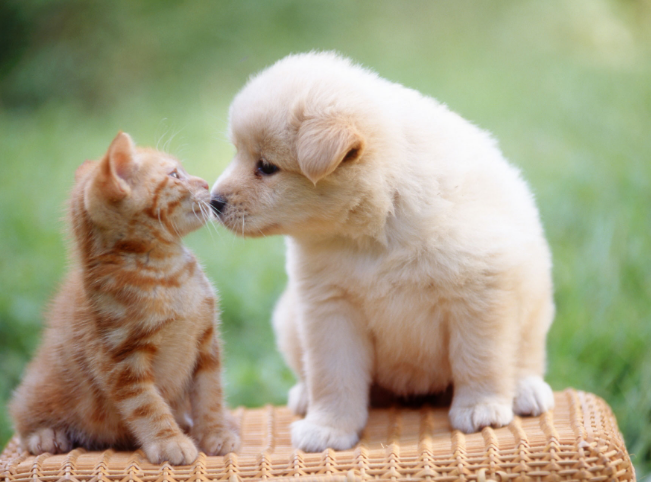

In [3]:
# Subscription Key와 접속에 필요한 URL을 설정합니다.
subscription_key = 'xxxxxxxxxxxxxxxxxxxxxxxxxxxxx'   # key1
vision_base_url = 'https://XXXXXXXcomputervision.cognitiveservices.azure.com/vision/v2.0/' # endpoint + vision/v2.0

# Object Detection
objectDetection_url = vision_base_url + 'detect'

# 분석에 사용할 이미지 url
image_url = 'https://mblogthumb-phinf.pstatic.net/MjAyMDA5MDdfMjQ1/MDAxNTk5NDY1MjUxMjM4.zbBfDyquP67Utlw2d6pFOtHqnJyfkukH3PTDgDTg8Zkg.qQWiX02sgIaExMrU-guWXKDRsmnGBBxeS_bz2Ioy8YUg.PNG.vet6390/%EA%B0%95%EC%95%84%EC%A7%80_%EA%B3%A0%EC%96%91%EC%9D%B4_%ED%95%A8%EA%BB%98_%ED%82%A4%EC%9A%B0%EA%B8%B0.PNG?type=w800'
image = Image.open(BytesIO(requests.get(image_url).content))
image

#### 헤더, 파라미터, 데이터(이미지 url) 설정

In [4]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params  = {'visualFeatures': 'Categories,Description,Color'} #object detection할 때는 parametr 별로 안 필요 !! 
data = {'url': image_url}

In [5]:
# get or post
response = requests.post(objectDetection_url, headers = headers, params = params, json = data) #get or post
result = response.json()
result

{'objects': [{'rectangle': {'x': 211, 'y': 35, 'w': 349, 'h': 407},
   'object': 'dog',
   'confidence': 0.543,
   'parent': {'object': 'mammal',
    'confidence': 0.929,
    'parent': {'object': 'animal', 'confidence': 0.949}}},
  {'rectangle': {'x': 8, 'y': 125, 'w': 237, 'h': 347},
   'object': 'cat',
   'confidence': 0.824,
   'parent': {'object': 'mammal',
    'confidence': 0.89,
    'parent': {'object': 'animal', 'confidence': 0.891}}}],
 'requestId': 'cbdc6e1e-09b7-4e43-a4b7-f25c15ea5b85',
 'metadata': {'height': 482, 'width': 651, 'format': 'Png'}}

In [6]:
from PIL import Image, ImageDraw, ImageFont

# 원하는 곳에 이미지 그리기
draw = ImageDraw.Draw(image)

### boundingBox를 위한 함수

In [7]:
def DrawBox(detectData):
    objects = detectData['objects']
    
    for obj in objects:
        # print(obj)
        rect = obj['rectangle']
        # print(rect)
        
        x = rect['x']
        y = rect['y']
        w = rect['w']
        h = rect['h']
        
        draw.rectangle(((x,y),(x+w,y+h)),outline = 'red')
        objectName = obj['object']
        
        # 원하는 곳에 텍스트 만들기
        draw.text((x,y), objectName, fill='red')

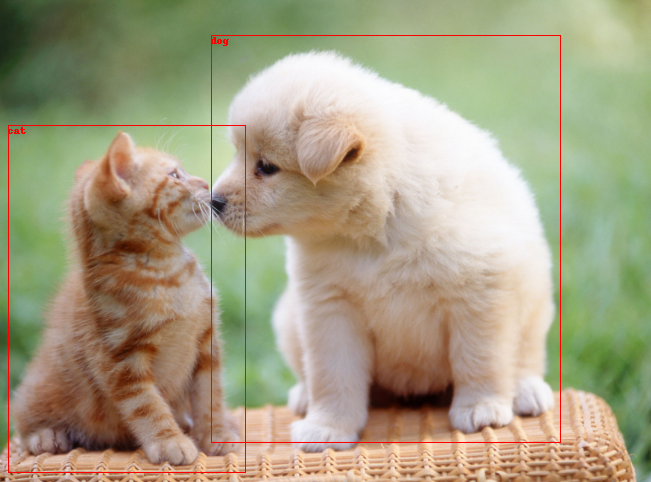

In [8]:
DrawBox(result)
image